In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data2 = pd.read_csv('data_two.csv')
data2

,X,y
0,-2.000000,-36.235948
1,-1.991984,-37.224373
2,-1.983968,-36.272883
3,-1.975952,-34.640371
4,-1.967936,-34.645891
...,...,...
495,1.967936,20.948438
496,1.975952,20.605167
497,1.983968,20.992872
498,1.991984,20.734488


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


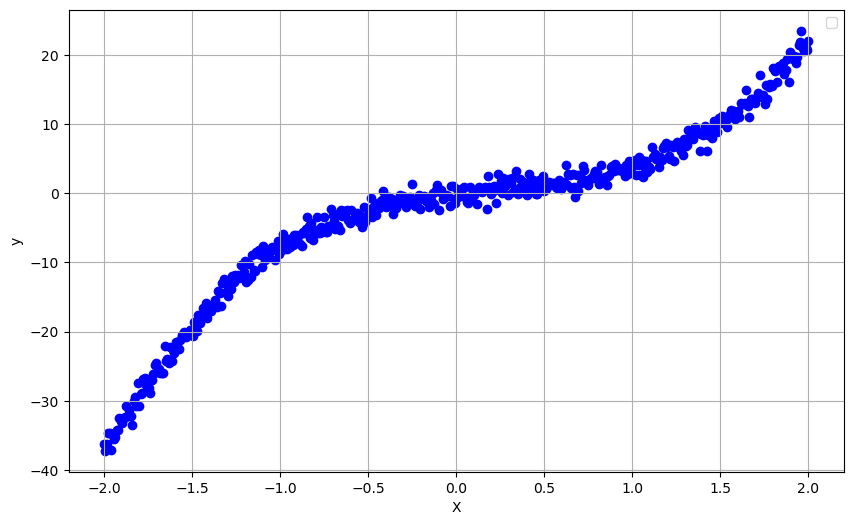

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(data2['X'], data2['y'], color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### 2차 함수로 회귀시켜보자->  X데이터에 1, ^1, ^2 으로 변환

In [4]:
X = data2['X'].values.reshape(-1, 1)
Y = data2['y'].values.reshape(-1, 1)

ones = np.ones((X.shape[0], 1))
X_double = X ** 2

X = np.concatenate((ones, X, X_double), axis=1)

X[:5]

array([[ 1.        , -2.        ,  4.        ],
       [ 1.        , -1.99198397,  3.96800013],
       [ 1.        , -1.98396794,  3.93612877],
       [ 1.        , -1.9759519 ,  3.90438593],
       [ 1.        , -1.96793587,  3.8727716 ]])

## Normal Equation

In [5]:
theta = np.linalg.inv(X.T @ X) @ X.T @ Y
print(theta)

[[-0.10267236]
 [10.17461517]
 [-1.94224305]]


## Gradient Descent

In [6]:
eta = 0.001
n_iterations = 100000
m = 500


for iteration in range(n_iterations):
    gradients = 2/m * X.T @ (X @ theta - Y)
    theta = theta - eta * gradients
    
print(theta)

[[-0.10267236]
 [10.17461517]
 [-1.94224305]]


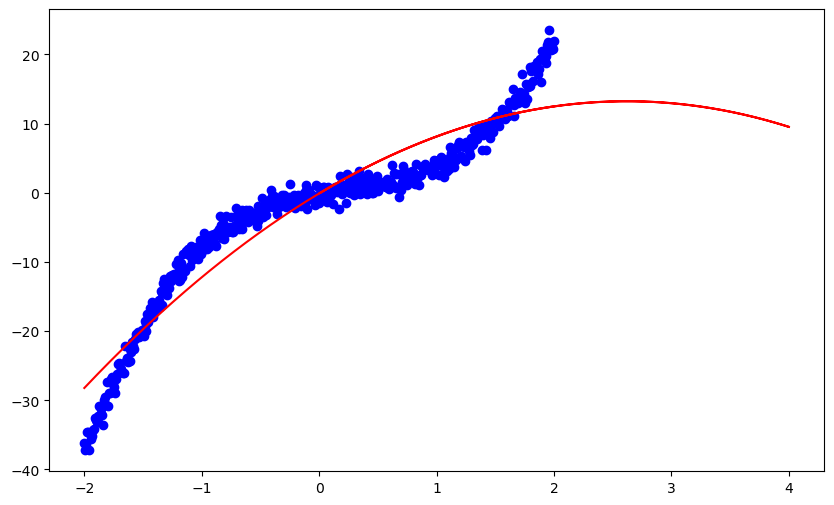

In [7]:
theta0 = theta[0]
theta1 = theta[1]
theta2 = theta[2]

plt.figure(figsize=(10, 6))
plt.scatter(data2['X'], data2['y'], color='b')
plt.plot(X, theta2*X**2 + theta1*X + theta0, color='r')

### 2차로는 제대로 표현 불가능 $\to$ 3차로 표현해보자!

In [8]:
X_data = data2['X'].values.reshape(-1, 1)

X_3 = X_data ** 3


X = np.concatenate([X, X_3], axis=1)

theta2 = np.linalg.inv(X.T @ X) @ X.T @ Y

theta2

array([[-0.10267236],
       [ 2.90199741],
       [-1.94224305],
       [ 3.01817666]])

In [9]:
eta = 0.001
n_iterations = 100000
m = 500


for iteration in range(n_iterations):
    gradients = 2/m * X.T @ (X @ theta2 - Y)
    theta2 = theta2 - eta * gradients
    
print(theta2)

[[-0.10267236]
 [ 2.90199741]
 [-1.94224305]
 [ 3.01817666]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


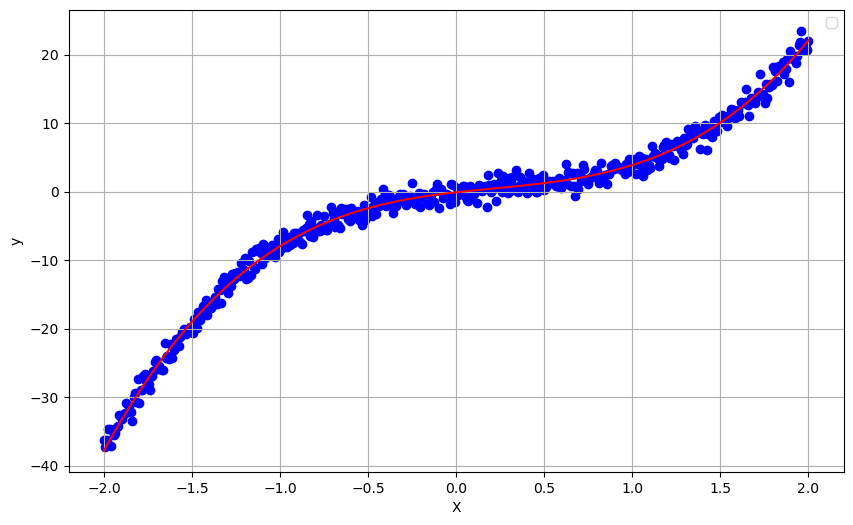

In [10]:
y_predict = X @ theta2

plt.figure(figsize=(10,6))
plt.scatter(X_data, data2['y'], color='b')
plt.plot(X_data, y_predict, color='r')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()